In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sbody = '2004 PY107'
objname = '2004PY107'
dt=500.
#path = 'Asteroids/'+objname
path = 'TNOs/'+objname
series = pd.read_csv(path+'/series.csv')

t = series['t'].values
a = series['a'].values
e = series['e'].values
inc = series['inc'].values*np.pi/180
#omega = series['omega'].values*np.pi/180
#Omega = series['Omega'].values*np.pi/180
#M = series['M'].values*np.pi/180
#h = np.sin(inc)*np.sin(Omega)
#k = np.sin(inc)*np.cos(Omega)
#p = e*np.sin(Omega+omega)
#q = e*np.cos(Omega+omega)

hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values

hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values

hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values

plt.scatter(t,h)
plt.show()
plt.scatter(t,h-np.sin(t))

NameError: name 'h' is not defined

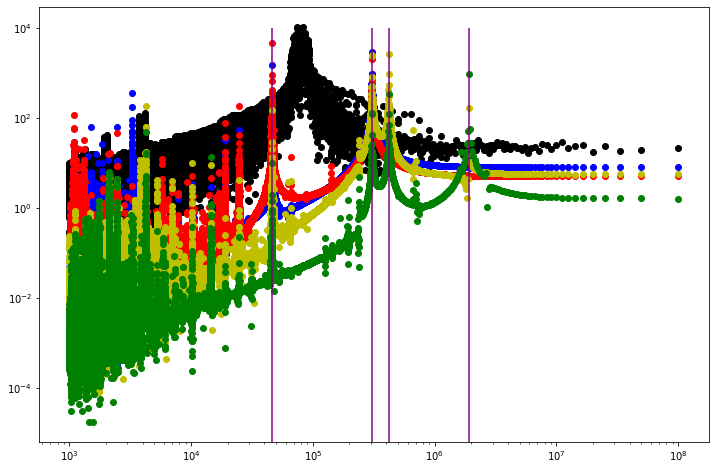

In [16]:
pYh = np.abs(np.fft.rfft(h))
pYhj = np.abs(np.fft.rfft(hj))
pYhs = np.abs(np.fft.rfft(hs))
pYhu = np.abs(np.fft.rfft(hu))
pYhn = np.abs(np.fft.rfft(hn))

ihumax = np.argmax(pYhu[1:])+1
ihnmax = np.argmax(pYhn[1:])+1 
ihsmax = np.argmax(pYhs[1:])+1 
ihjmax = np.argmax(pYhj[1:])+1 

n = len(h)
freq = np.fft.rfftfreq(n,d=dt)
plt.figure(figsize=(12,8))
xs = [1,10000]
plt.vlines(x = [1/freq[ihumax], 1/freq[ihnmax], 1/freq[ihsmax], 1/freq[ihjmax]], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.scatter(1/freq[1:],pYh[1:],label='particle',c='k')
plt.scatter(1/freq[1:],pYhj[1:],label='particle',c='b')
plt.scatter(1/freq[1:],pYhs[1:],label='particle',c='r')
plt.scatter(1/freq[1:],pYhu[1:],label='particle',c='y')
plt.scatter(1/freq[1:],pYhn[1:],label='particle',c='g')
plt.xscale('log')
plt.yscale('log')

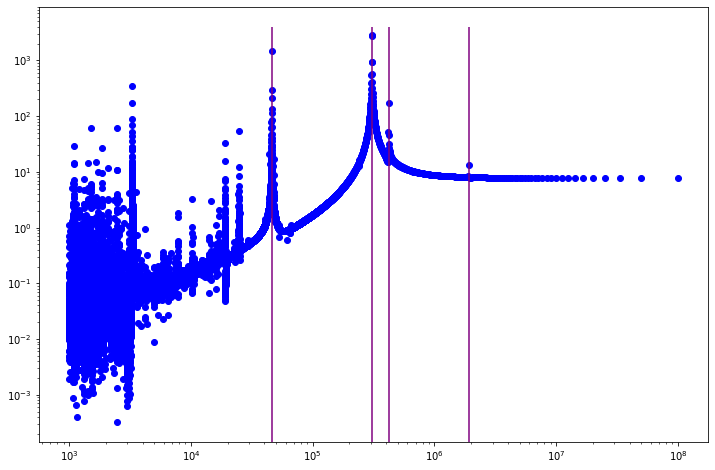

In [22]:
plt.figure(figsize=(12,8))
xs = [1,4000]
plt.vlines(x = [1/freq[ihumax], 1/freq[ihnmax], 1/freq[ihsmax], 1/freq[ihjmax]], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.scatter(1/freq[1:],pYhj[1:],label='particle',c='b')
plt.xscale('log')
plt.yscale('log')

100001 327
[-8.36205031e-05  8.02021116e-01  4.27867825e-01]


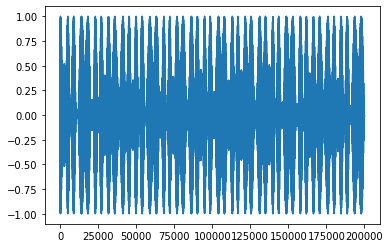

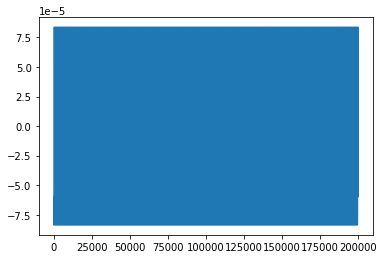

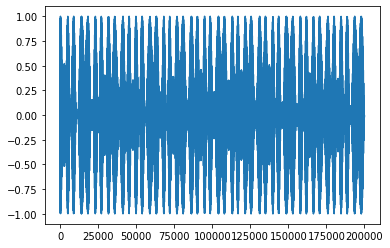

In [85]:
from scipy.optimize import minimize 
from scipy import stats
#x = np.linspace(-10, 30, 100)

print(len(pYhj),ihjmax)
x = t

#print(x)

# create a normally distributed residual
e = np.random.normal(10, 5, 100)

# generate ground truth
y = h

def MLE_Norm(parameters, freq):
    # extract parameters
    const, phase, std_dev = parameters
    # predict the output
    pred = const*np.sin(freq*2*np.pi*t+phase)
    #pred = const/beta/np.sqrt(2*np.pi)*np.exp(-0.5*((x-std_dev)/beta)**2)
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL

mle_model = minimize(MLE_Norm, np.array([1,0.5,2]), method='Nelder-Mead', args=freq[ihjmax])
print(mle_model.x)

plt.plot(y)
plt.show()
const = mle_model.x[0]
phase = mle_model.x[1]
std_dev = mle_model.x[2]

#const = 35000
#beta = 300
#std_dev = 5
guess = const*np.sin(freq[ihjmax]*2*np.pi*x+phase)
#print(guess)
plt.plot(guess)
plt.show()

plt.plot(y-guess)


In [4]:
from rocks import Rock
ceres = Rock("2004 py107")
print(ceres.e)

0.09768007 +- 0.00000010 


Index(['Unnamed: 0', 'h_j_max', 'k_j_max', 'p_j_max', 'q_j_max', 'h_s_max',
       'k_s_max', 'p_s_max', 'q_s_max', 'h_u_max', 'k_u_max', 'p_u_max',
       'q_u_max', 'h_n_max', 'k_n_max', 'p_n_max', 'q_n_max', 'h_j_freq',
       'k_j_freq', 'p_j_freq', 'q_j_freq', 'h_s_freq', 'k_s_freq', 'p_s_freq',
       'q_s_freq', 'h_u_freq', 'k_u_freq', 'p_u_freq', 'q_u_freq', 'h_n_freq',
       'k_n_freq', 'p_n_freq', 'q_n_freq'],
      dtype='object')
Index(['Name', 'mag.', 'a(AU)', 'e', 'sinI', 'n(deg/yr)', 'g("/y)', 's("/yr)',
       'LCEx1E6', 'My'],
      dtype='object')


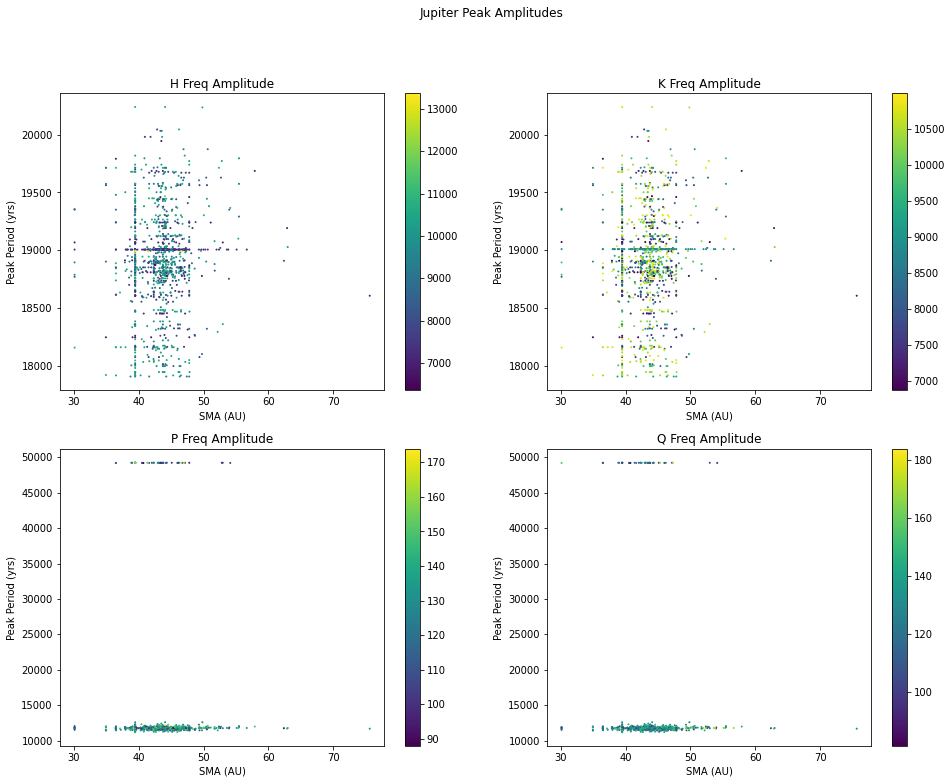

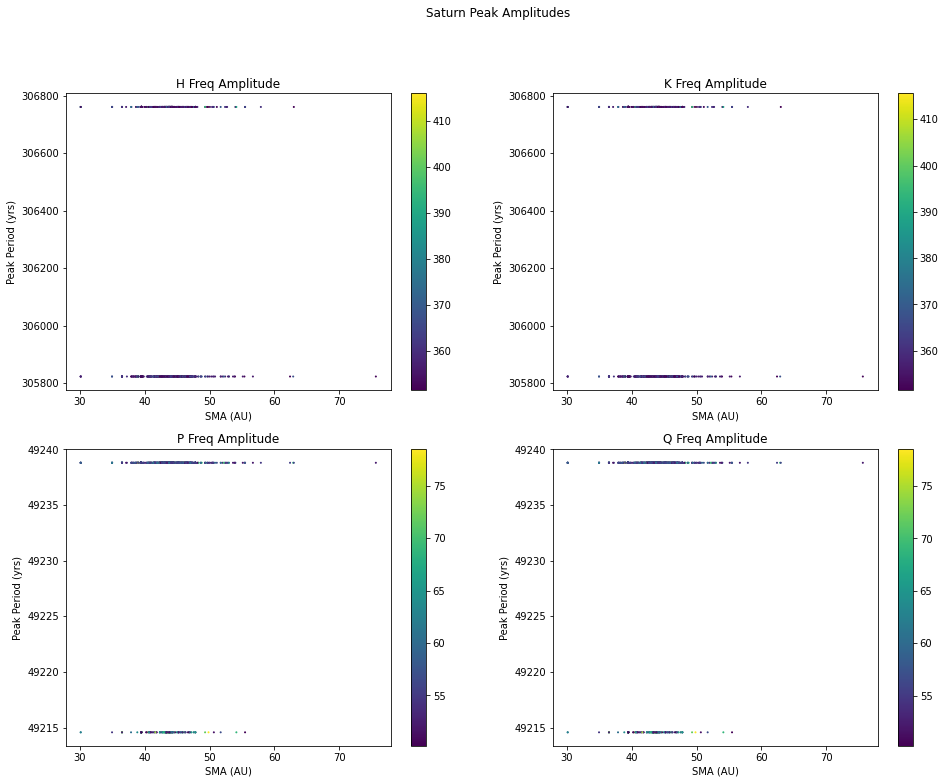

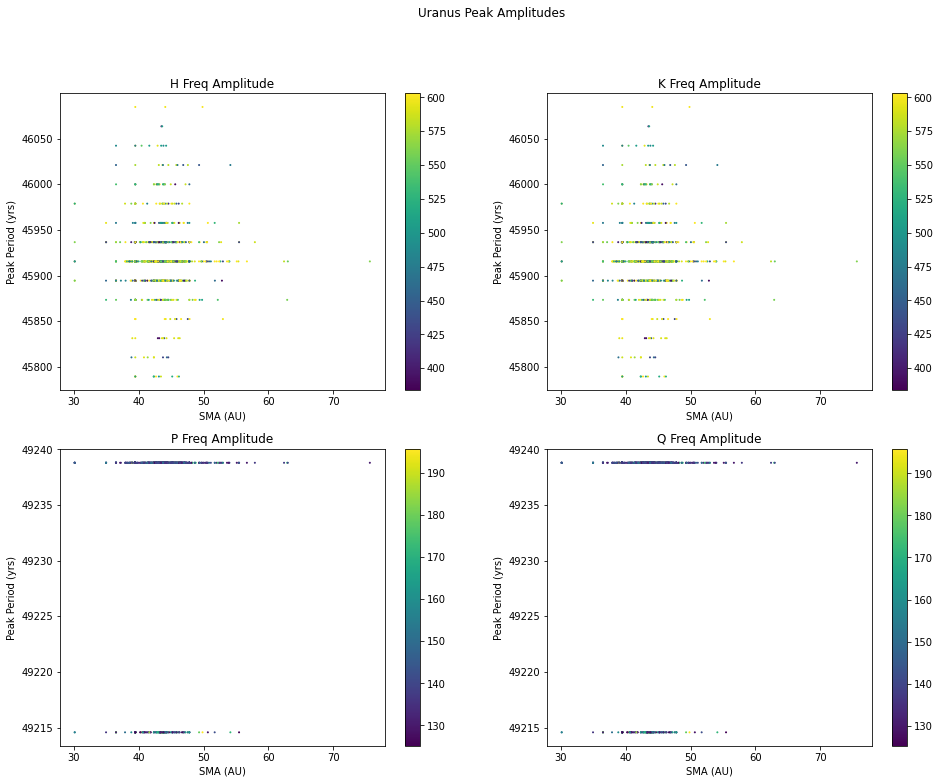

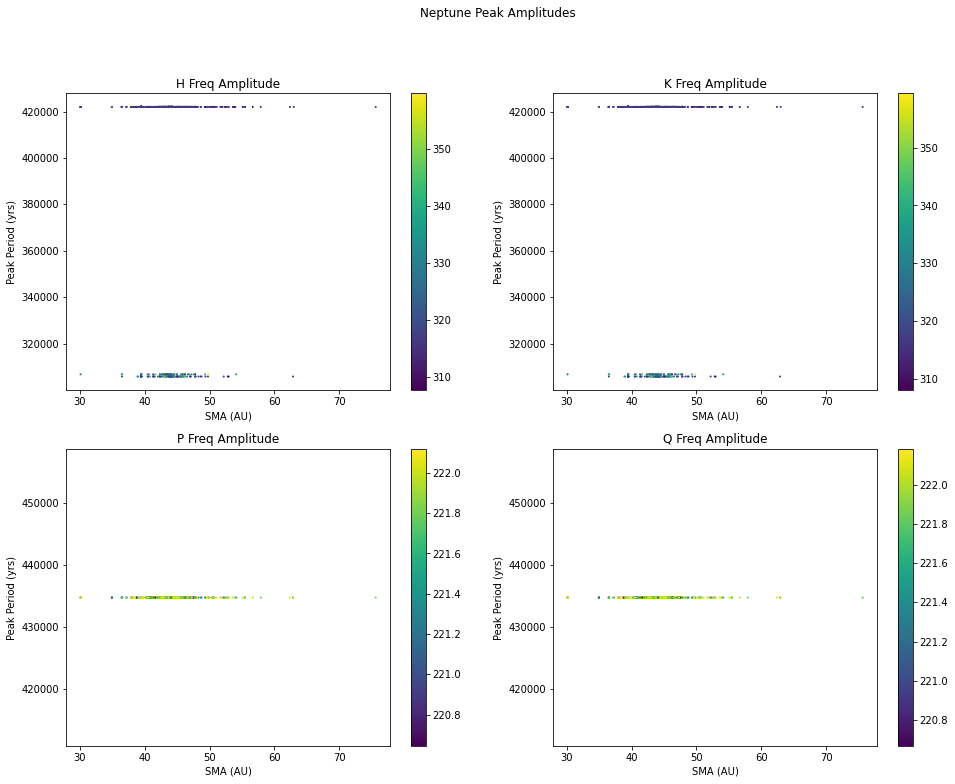

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
gp_data = pd.read_csv('gp_freqs.csv')

astdys = pd.read_csv('TNOs/astdys_tnos.csv')
print(gp_data.columns)
print(astdys.columns)

fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(astdys['a(AU)'],1/gp_data['h_j_freq'],c=gp_data['h_j_max'],s=1)
im2 = ax[0,1].scatter(astdys['a(AU)'],1/gp_data['k_j_freq'],c=gp_data['k_j_max'],s=1)
im3 = ax[1,0].scatter(astdys['a(AU)'],1/gp_data['p_j_freq'],c=gp_data['p_j_max'],s=1)
im4 = ax[1,1].scatter(astdys['a(AU)'],1/gp_data['q_j_freq'],c=gp_data['q_j_max'],s=1)
ax[0,0].set_xlabel('SMA (AU)')
ax[0,0].set_ylabel('Peak Period (yrs)')
ax[0,1].set_xlabel('SMA (AU)')
ax[0,1].set_ylabel('Peak Period (yrs)')
ax[1,0].set_xlabel('SMA (AU)')
ax[1,0].set_ylabel('Peak Period (yrs)')
ax[1,1].set_xlabel('SMA (AU)')
ax[1,1].set_ylabel('Peak Period (yrs)')

ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Jupiter Peak Amplitudes')
plt.show()


fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(astdys['a(AU)'],1/gp_data['h_s_freq'],c=gp_data['h_s_max'],s=1)
im2 = ax[0,1].scatter(astdys['a(AU)'],1/gp_data['k_s_freq'],c=gp_data['k_s_max'],s=1)
im3 = ax[1,0].scatter(astdys['a(AU)'],1/gp_data['p_s_freq'],c=gp_data['p_s_max'],s=1)
im4 = ax[1,1].scatter(astdys['a(AU)'],1/gp_data['q_s_freq'],c=gp_data['q_s_max'],s=1)
ax[0,0].set_xlabel('SMA (AU)')
ax[0,0].set_ylabel('Peak Period (yrs)')
ax[0,1].set_xlabel('SMA (AU)')
ax[0,1].set_ylabel('Peak Period (yrs)')
ax[1,0].set_xlabel('SMA (AU)')
ax[1,0].set_ylabel('Peak Period (yrs)')
ax[1,1].set_xlabel('SMA (AU)')
ax[1,1].set_ylabel('Peak Period (yrs)')

ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Saturn Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(astdys['a(AU)'],1/gp_data['h_u_freq'],c=gp_data['h_u_max'],s=1)
im2 = ax[0,1].scatter(astdys['a(AU)'],1/gp_data['k_u_freq'],c=gp_data['k_u_max'],s=1)
im3 = ax[1,0].scatter(astdys['a(AU)'],1/gp_data['p_u_freq'],c=gp_data['p_u_max'],s=1)
im4 = ax[1,1].scatter(astdys['a(AU)'],1/gp_data['q_u_freq'],c=gp_data['q_u_max'],s=1)
ax[0,0].set_xlabel('SMA (AU)')
ax[0,0].set_ylabel('Peak Period (yrs)')
ax[0,1].set_xlabel('SMA (AU)')
ax[0,1].set_ylabel('Peak Period (yrs)')
ax[1,0].set_xlabel('SMA (AU)')
ax[1,0].set_ylabel('Peak Period (yrs)')
ax[1,1].set_xlabel('SMA (AU)')
ax[1,1].set_ylabel('Peak Period (yrs)')

ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Uranus Peak Amplitudes')
plt.show()


fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(astdys['a(AU)'],1/gp_data['h_n_freq'],c=gp_data['h_n_max'],s=1)
im2 = ax[0,1].scatter(astdys['a(AU)'],1/gp_data['k_n_freq'],c=gp_data['k_n_max'],s=1)
im3 = ax[1,0].scatter(astdys['a(AU)'],1/gp_data['p_n_freq'],c=gp_data['p_n_max'],s=1)
im4 = ax[1,1].scatter(astdys['a(AU)'],1/gp_data['q_n_freq'],c=gp_data['q_n_max'],s=1)
ax[0,0].set_xlabel('SMA (AU)')
ax[0,0].set_ylabel('Peak Period (yrs)')
ax[0,1].set_xlabel('SMA (AU)')
ax[0,1].set_ylabel('Peak Period (yrs)')
ax[1,0].set_xlabel('SMA (AU)')
ax[1,0].set_ylabel('Peak Period (yrs)')
ax[1,1].set_xlabel('SMA (AU)')
ax[1,1].set_ylabel('Peak Period (yrs)')

ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Neptune Peak Amplitudes')
plt.show()

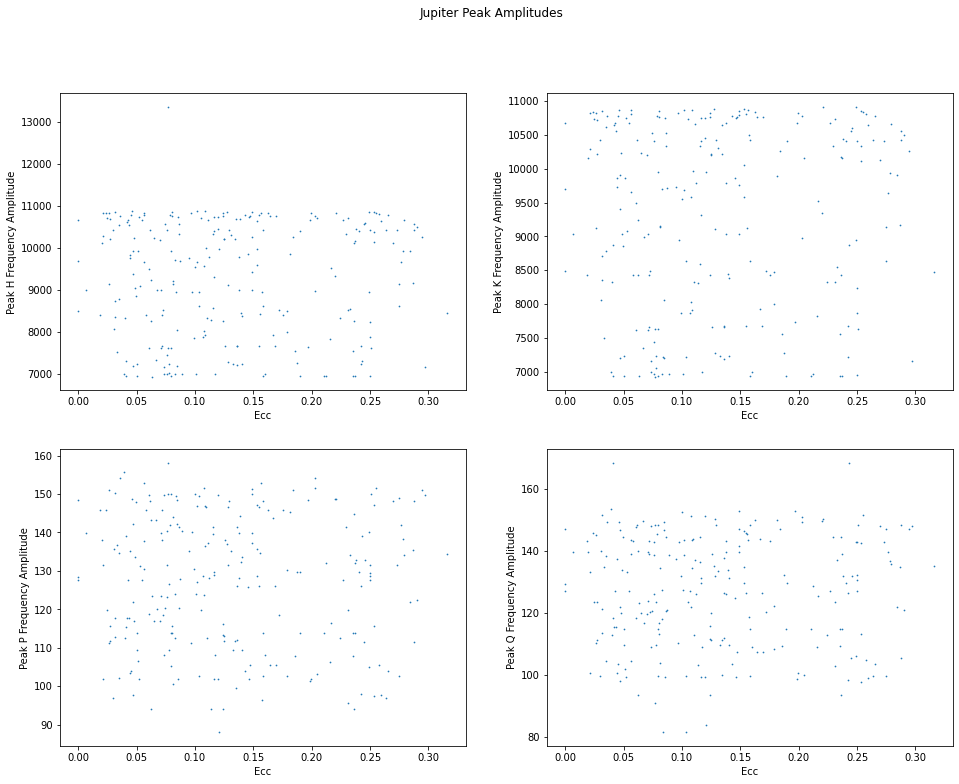

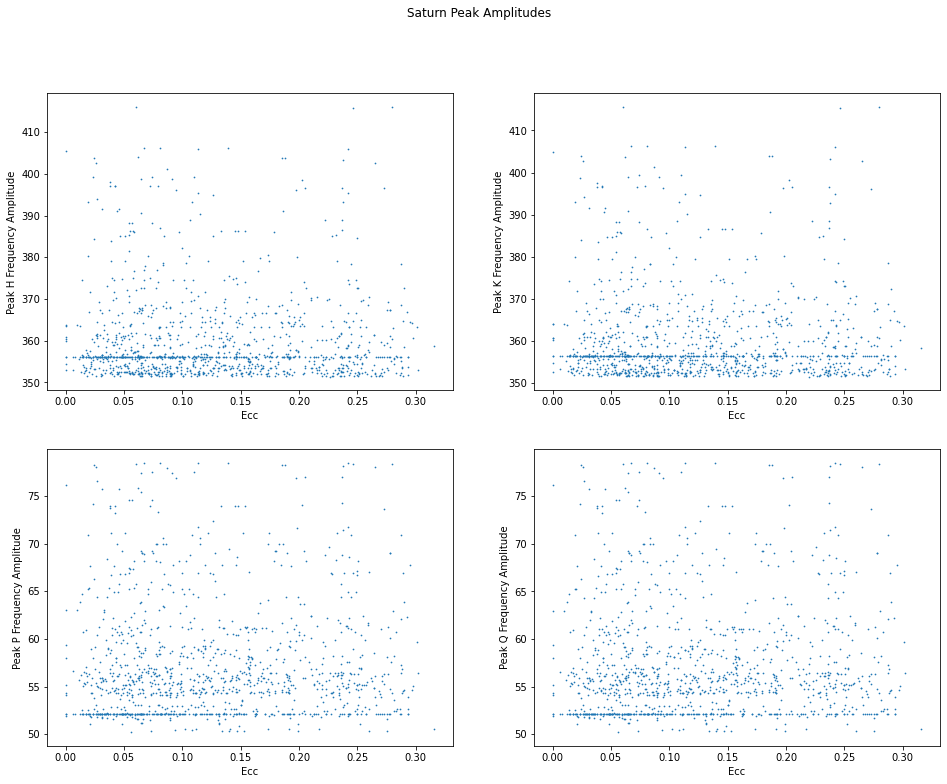

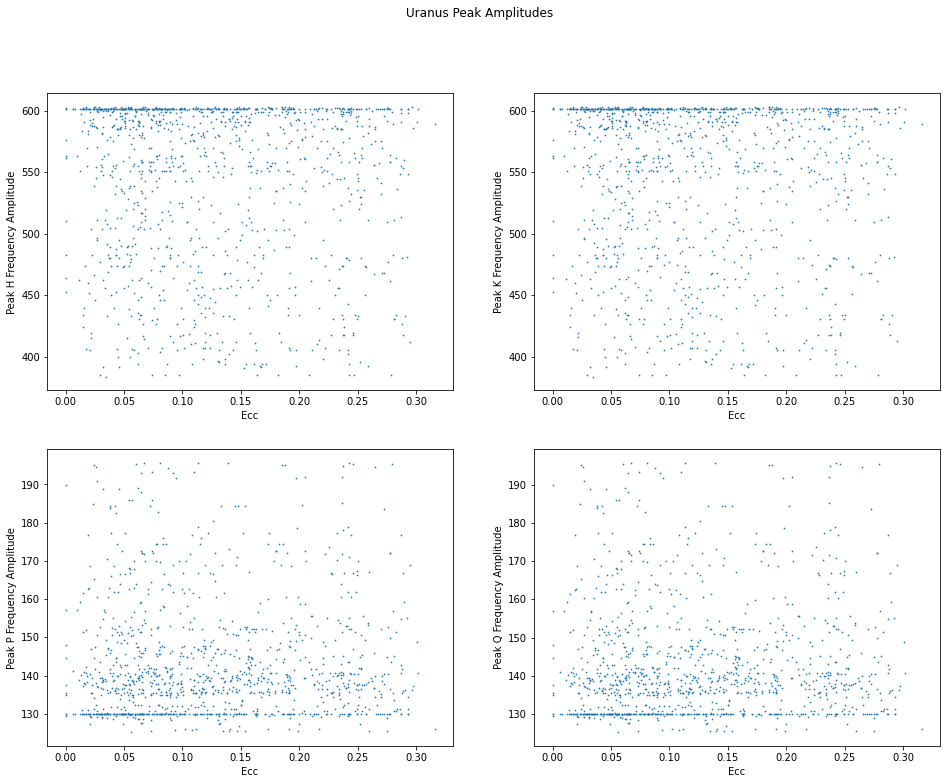

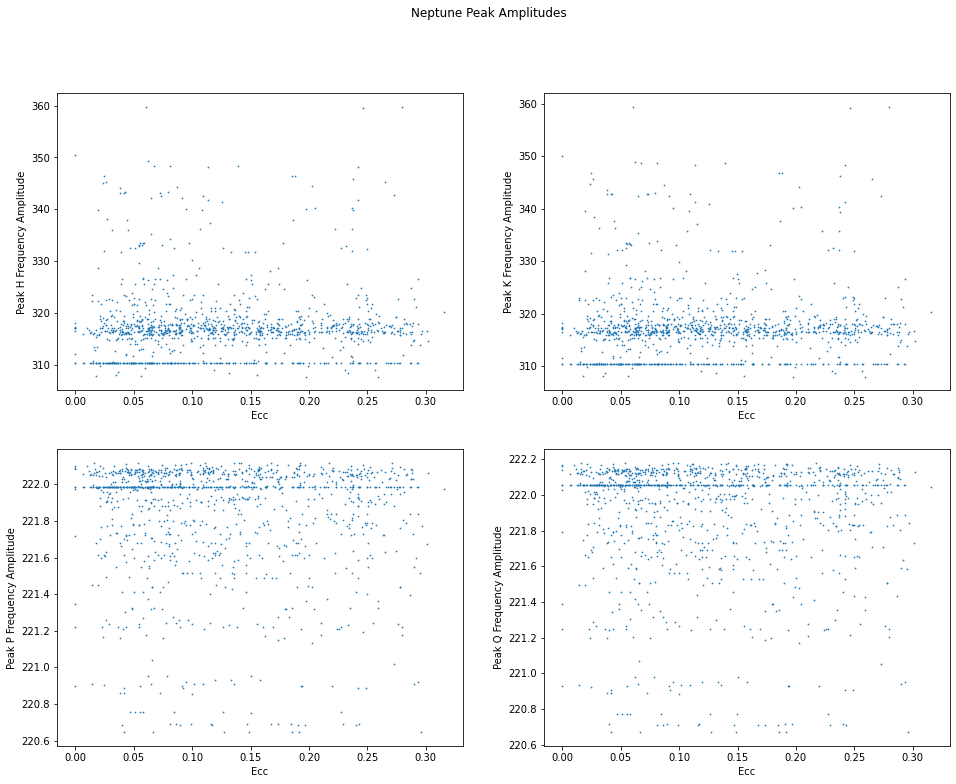

In [17]:

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['e'][0:242],gp_data['h_j_max'][0:242],s=0.5)
ax[0,1].scatter(astdys['e'][0:242],gp_data['k_j_max'][0:242],s=0.5)
ax[1,0].scatter(astdys['e'][0:242],gp_data['p_j_max'][0:242],s=0.5)
ax[1,1].scatter(astdys['e'][0:242],gp_data['q_j_max'][0:242],s=0.5)
ax[0,0].set_xlabel('Ecc')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('Ecc')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('Ecc')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('Ecc')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Jupiter Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['e'],gp_data['h_s_max'],s=0.5)
ax[0,1].scatter(astdys['e'],gp_data['k_s_max'],s=0.5)
ax[1,0].scatter(astdys['e'],gp_data['p_s_max'],s=0.5)
ax[1,1].scatter(astdys['e'],gp_data['q_s_max'],s=0.5)
ax[0,0].set_xlabel('Ecc')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('Ecc')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('Ecc')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('Ecc')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Saturn Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['e'],gp_data['h_u_max'],s=0.5)
ax[0,1].scatter(astdys['e'],gp_data['k_u_max'],s=0.5)
ax[1,0].scatter(astdys['e'],gp_data['p_u_max'],s=0.5)
ax[1,1].scatter(astdys['e'],gp_data['q_u_max'],s=0.5)
ax[0,0].set_xlabel('Ecc')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('Ecc')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('Ecc')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('Ecc')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Uranus Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['e'],gp_data['h_n_max'],s=0.5)
ax[0,1].scatter(astdys['e'],gp_data['k_n_max'],s=0.5)
ax[1,0].scatter(astdys['e'],gp_data['p_n_max'],s=0.5)
ax[1,1].scatter(astdys['e'],gp_data['q_n_max'],s=0.5)
ax[0,0].set_xlabel('Ecc')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('Ecc')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('Ecc')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('Ecc')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Neptune Peak Amplitudes')
plt.show()

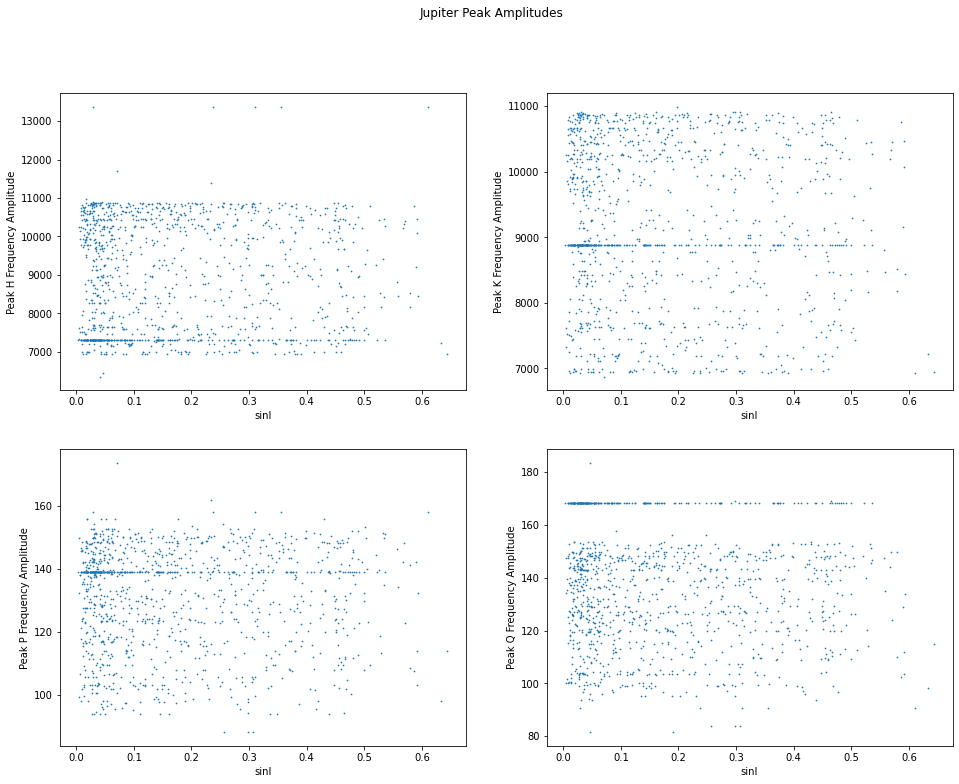

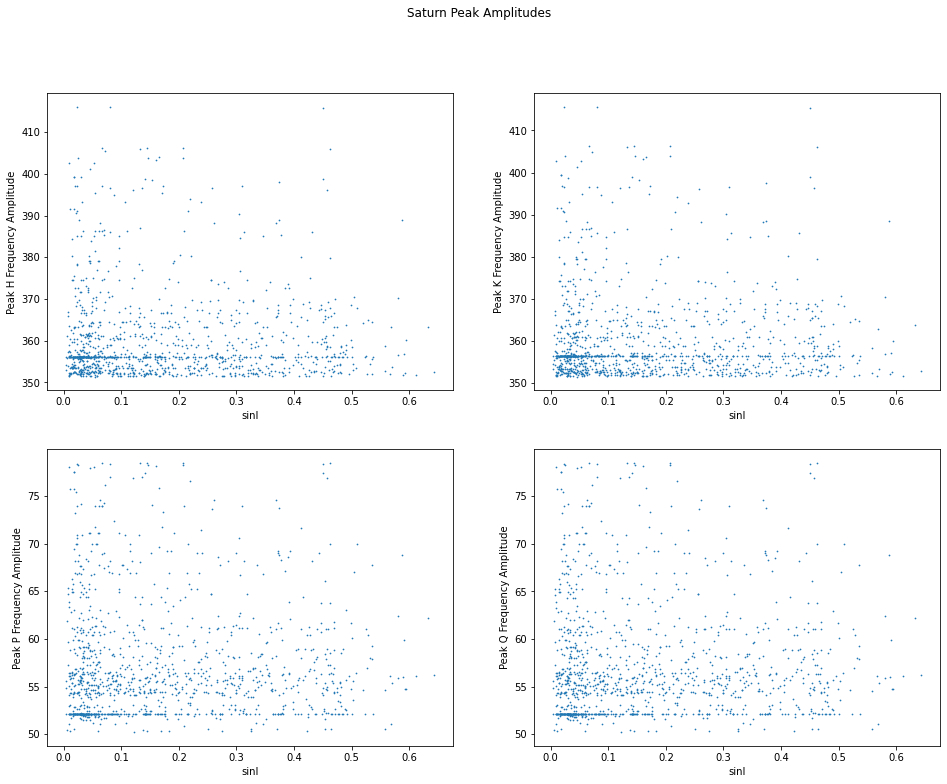

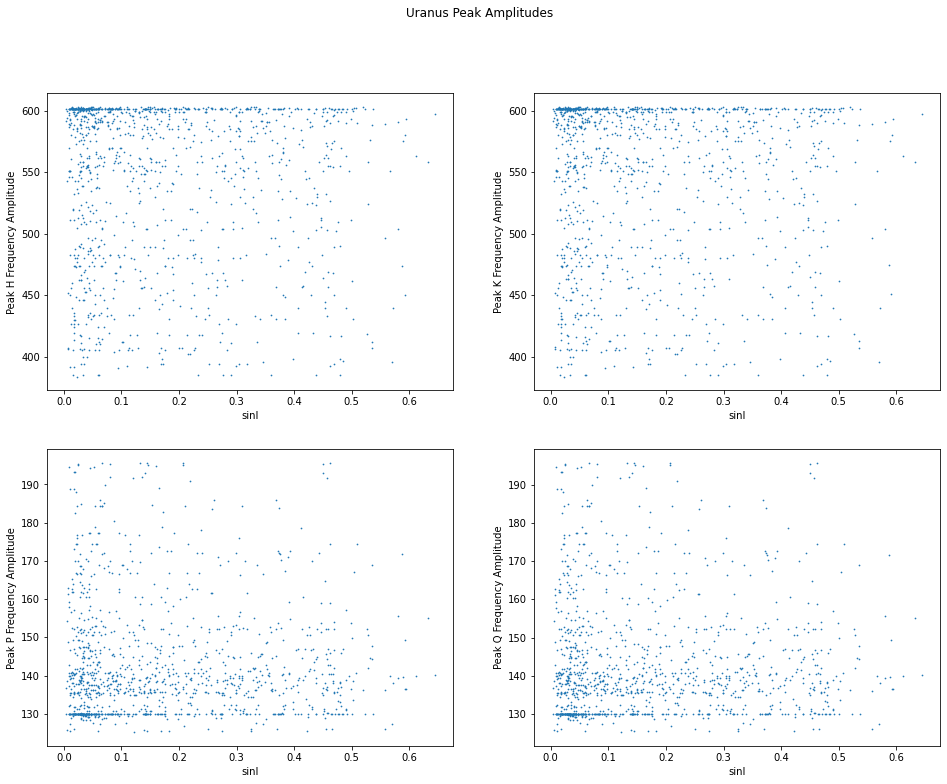

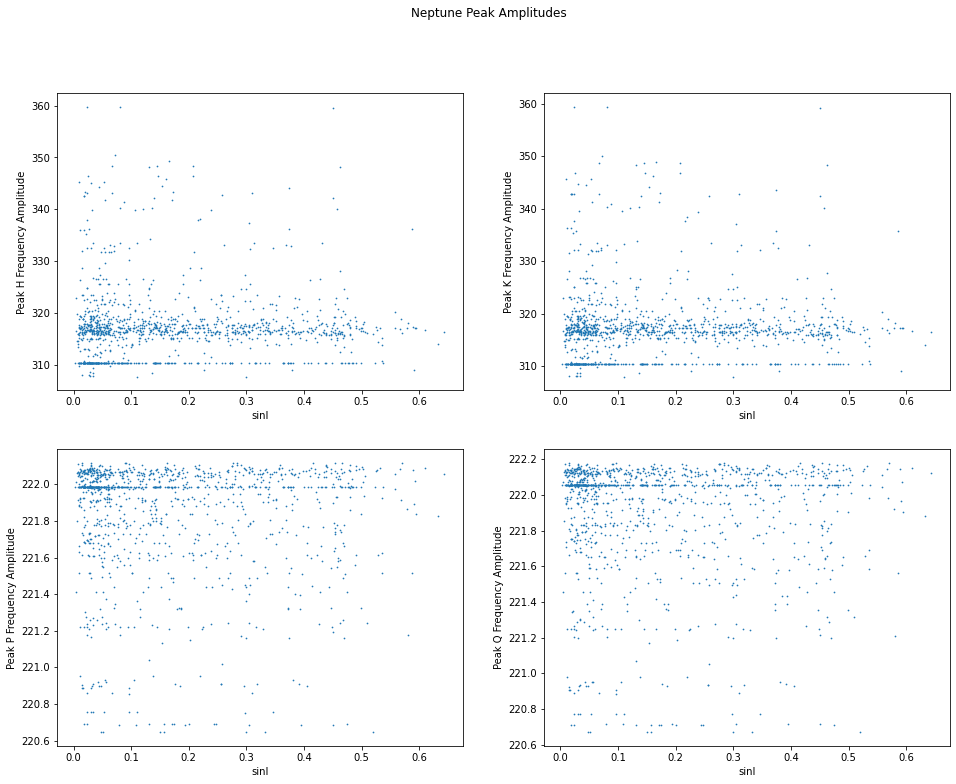

In [16]:
fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['sinI'],gp_data['h_j_max'],s=0.5)
ax[0,1].scatter(astdys['sinI'],gp_data['k_j_max'],s=0.5)
ax[1,0].scatter(astdys['sinI'],gp_data['p_j_max'],s=0.5)
ax[1,1].scatter(astdys['sinI'],gp_data['q_j_max'],s=0.5)
ax[0,0].set_xlabel('sinI')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('sinI')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('sinI')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('sinI')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Jupiter Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['sinI'],gp_data['h_s_max'],s=0.5)
ax[0,1].scatter(astdys['sinI'],gp_data['k_s_max'],s=0.5)
ax[1,0].scatter(astdys['sinI'],gp_data['p_s_max'],s=0.5)
ax[1,1].scatter(astdys['sinI'],gp_data['q_s_max'],s=0.5)
ax[0,0].set_xlabel('sinI')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('sinI')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('sinI')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('sinI')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Saturn Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['sinI'],gp_data['h_u_max'],s=0.5)
ax[0,1].scatter(astdys['sinI'],gp_data['k_u_max'],s=0.5)
ax[1,0].scatter(astdys['sinI'],gp_data['p_u_max'],s=0.5)
ax[1,1].scatter(astdys['sinI'],gp_data['q_u_max'],s=0.5)
ax[0,0].set_xlabel('sinI')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('sinI')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('sinI')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('sinI')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Uranus Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['sinI'],gp_data['h_n_max'],s=0.5)
ax[0,1].scatter(astdys['sinI'],gp_data['k_n_max'],s=0.5)
ax[1,0].scatter(astdys['sinI'],gp_data['p_n_max'],s=0.5)
ax[1,1].scatter(astdys['sinI'],gp_data['q_n_max'],s=0.5)
ax[0,0].set_xlabel('sinI')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('sinI')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('sinI')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('sinI')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Neptune Peak Amplitudes')
plt.show()

Text(0, 0.5, 'Peak Amplitude')

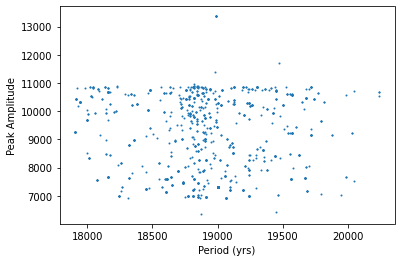

In [55]:

plt.scatter(1/gp_data['h_j_freq'],gp_data['h_j_max'],s=1)
plt.xlabel('Period (yrs)')
plt.ylabel('Peak Amplitude')

[[0.53081349 0.21474232 0.74524549 0.47301146 0.6146549  0.59260137
  0.77791677 0.89140926 0.22388712 0.0936709  0.60086371 0.81635797
  0.08061219 0.89138536 0.79808585 0.58817014 0.51286733 0.86405485
  0.66350241 0.95459136 0.16996043 0.07361178 0.0118709  0.60611925
  0.33430885]
 [0.02720072 0.18635273 0.518613   0.12303903 0.14780193 0.88929984
  0.75175954 0.20401364 0.65096661 0.50242015 0.05450798 0.45572005
  0.47792034 0.97527843 0.80701709 0.75909298 0.57812126 0.20244486
  0.39357271 0.5589227  0.04939523 0.00438348 0.69629379 0.02557466
  0.46063281]
 [0.34440307 0.72080493 0.42273269 0.93968742 0.14473629 0.23325514
  0.39456684 0.13817159 0.78596365 0.59080668 0.20718371 0.3657239
  0.7166735  0.01234532 0.19932386 0.53212511 0.03805737 0.80310421
  0.96220212 0.59097968 0.81108348 0.86874946 0.90734258 0.35955873
  0.85125822]
 [0.20464781 0.35684069 0.5425996  0.24707955 0.17722523 0.23157847
  0.08420141 0.35314669 0.42696109 0.82155946 0.71365823 0.45157977
  0.548

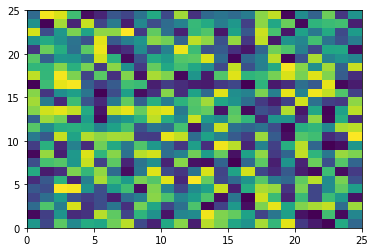

In [35]:
import numpy as np
Z = np.random.rand(25, 25)
plt.pcolormesh(Z)

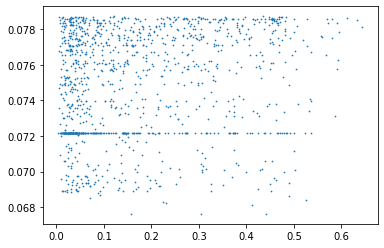

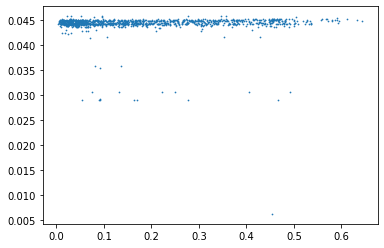

In [60]:
prop_elem = pd.read_csv('prop_elem.csv')
plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_ecc'],s=0.5)
plt.show()

plt.scatter(prop_elem['ast_ecc'],prop_elem['calc_sinI'],s=0.5)
plt.show()